# Stories

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
import calendar # for listing days of the week
from pandas.api.types import CategoricalDtype #for setting days in the right order
import matplotlib.ticker as ticker # for drawing day/hour ticks
import numpy.polynomial.polynomial as poly # for calculating trends to plot trend lines

In [172]:
#Read in the data
df = pd.read_csv('stories_data.csv')
df.drop([0], axis = 0, inplace = True) #Drop column descriptors
#Index the df with datetimes
df.set_index(pd.to_datetime(df['timestamp']), inplace = True)
df.drop(['timestamp', 'story_id'], axis = 1, inplace = True)
#Change remaining columns to int type
cols = ['exits', 'impressions', 'reach', 'replies', 'taps_forward', 'taps_back']
df[cols] = df[cols].astype(int)

In [173]:
df.head()

,exits,impressions,reach,replies,taps_forward,taps_back
timestamp,,,,,,
2019-10-27 16:42:13+00:00,5,157,137,0,97,4
2019-10-27 16:43:55+00:00,7,127,115,0,88,5
2019-10-27 16:45:02+00:00,3,114,107,0,79,4
2019-10-27 16:46:08+00:00,2,113,103,0,92,2
2019-10-27 16:48:40+00:00,2,109,101,0,77,5


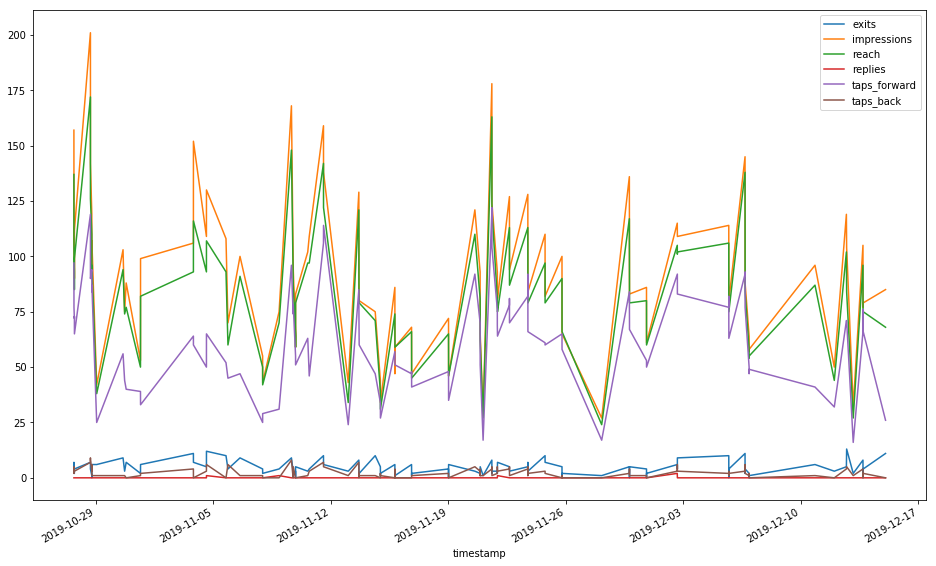

In [4]:
df.plot(figsize = (16,10))

### Get stories by hour and weekday

In [174]:
#Reset timestamps to be hour-long periods and fill in the periods with no data:
start = pd.Timestamp('2019-10-27 12:00:00+0000', tz='UTC')
end = pd.Timestamp('2019-12-15 12:00:00+0000', tz='UTC')
#Create a timeframe to use for reindexing
timeframe = pd.period_range(start = start, end = end, freq = 'H')
#Set the df index to periods 
df.set_index(df.index.to_period(freq = 'H'), inplace = True)
#Create a count column for use in group_by
df['count'] = np.ones(df.shape[0])
#Group the df to eliminate duplicate indices, then reindex for the timeframe
#Creates a sparse matrix
hourly = df.groupby(df.index).sum().reindex(timeframe)
#Reset the index from periods to datetimes so that weekdays can be extracted
hourly.set_index(hourly.index.to_timestamp(), inplace = True)
#Set order of day names by calendar not alphabet
day_names = calendar.day_name[:7]
day_cats = CategoricalDtype(categories = day_names, ordered = True)
#Create multindex with weekdays (correctly ordered) and hours 
hourly_mi = hourly.groupby([hourly.index.day_name().astype(day_cats), hourly.index.hour]).sum()

In [74]:
hourly_mi.head(50)

exits  impressions  reach  replies  taps_forward  taps_back  \
Monday    0     0.0          0.0    0.0      0.0           0.0        0.0   
          1     0.0          0.0    0.0      0.0           0.0        0.0   
          2     0.0          0.0    0.0      0.0           0.0        0.0   
          3     0.0          0.0    0.0      0.0           0.0        0.0   
          4     0.0          0.0    0.0      0.0           0.0        0.0   
          5     0.0          0.0    0.0      0.0           0.0        0.0   
          6     0.0          0.0    0.0      0.0           0.0        0.0   
          7     0.0          0.0    0.0      0.0           0.0        0.0   
          8     0.0          0.0    0.0      0.0           0.0        0.0   
          9     0.0          0.0    0.0      0.0           0.0        0.0   
          10    0.0          0.0    0.0      0.0           0.0        0.0   
          11    0.0          0.0    0.0      0.0           0.0        0.0   
          12    0.0          0.0    0.0      0.0           0.0        0.0   
          13   16.0        297.0  264.0      0.0         220.0       12.0   
          14   17.0        239.0  200.0      1.0         115.0        9.0   
          15   19.0        334.0  308.0      2.0         267.0       12.0   
          16   23.0        670.0  586.0      0.0         426.0       32.0   
          17    0.0          0.0    0.0      0.0           0.0        0.0   
          18   24.0       1024.0  960.0      0.0         840.0       19.0   
          19    0.0          0.0    0.0      0.0           0.0        0.0   
          20    0.0          0.0    0.0      0.0           0.0        0.0   
          21    0.0          0.0    0.0      0.0           0.0        0.0   
          22    0.0          0.0    0.0      0.0           0.0        0.0   
          23    0.0          0.0    0.0      0.0           0.0        0.0   
Tuesday   0    13.0        332.0  317.0      0.0         254.0        7.0   
          1     6.0         42.0   38.0      0.0          25.0        1.0   
          2     0.0          0.0    0.0      0.0           0.0        0.0   
          3     0.0          0.0    0.0      0.0           0.0        0.0   
          4     0.0          0.0    0.0      0.0           0.0        0.0   
          5     0.0          0.0    0.0      0.0           0.0        0.0   
          6     0.0          0.0    0.0      0.0           0.0        0.0   
          7     0.0          0.0    0.0      0.0           0.0        0.0   
          8     0.0          0.0    0.0      0.0           0.0        0.0   
          9     0.0          0.0    0.0      0.0           0.0        0.0   
          10    0.0          0.0    0.0      0.0           0.0        0.0   
          11    0.0          0.0    0.0      0.0           0.0        0.0   
          12    0.0          0.0    0.0      0.0           0.0        0.0   
          13    0.0          0.0    0.0      0.0           0.0        0.0   
          14    0.0          0.0    0.0      0.0           0.0        0.0   
          15    0.0          0.0    0.0      0.0           0.0        0.0   
          16    0.0          0.0    0.0      0.0           0.0        0.0   
          17    0.0          0.0    0.0      0.0           0.0        0.0   
          18   10.0        108.0   93.0      0.0          52.0        0.0   
          19    0.0          0.0    0.0      0.0           0.0        0.0   
          20   10.0        166.0  147.0      0.0          86.0        7.0   
          21    0.0          0.0    0.0      0.0           0.0        0.0   
          22    0.0          0.0    0.0      0.0           0.0        0.0   
          23    0.0          0.0    0.0      0.0           0.0        0.0   
Wednesday 0     3.0         43.0   34.0      0.0          24.0        1.0   
          1     0.0          0.0    0.0      0.0           0.0        0.0   

              count  
Monday    0     0.0  
          1     0.0  
          2     0.0 

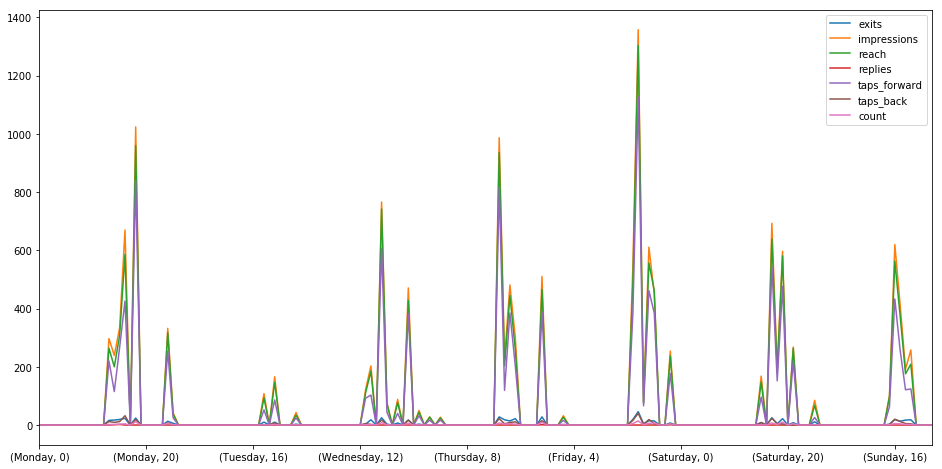

In [175]:
hourly_mi.plot(figsize = (16,8))

### Get averages by hour and weekday

Text(0.5, 1.0, 'Average story hits by hour')

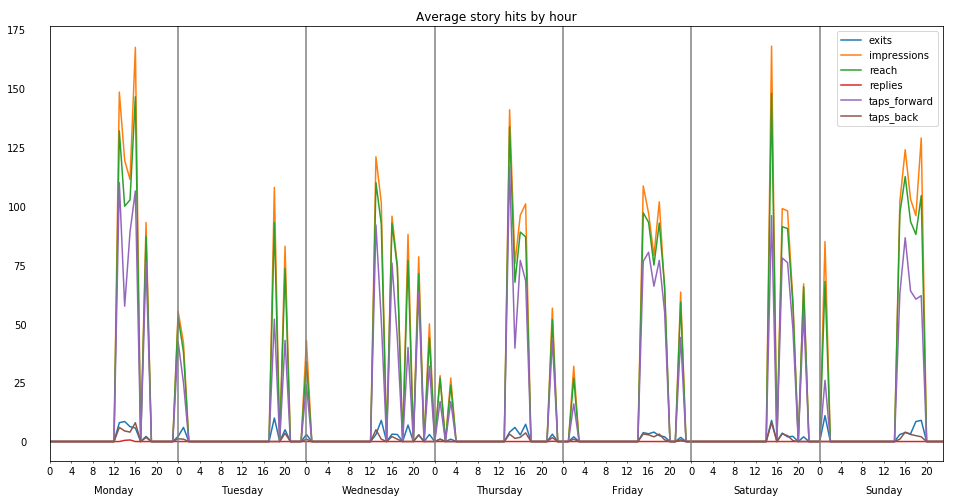

In [216]:
#Divide each column by its number of stories to get the mean
hourly_means = pd.DataFrame({col: hourly_mi[col] / hourly_mi['count'] for col in cols}).fillna(0)

#Plot hourly means 
ax = hourly_means.plot(figsize = (16, 8), x_compat = True)

#Create minor and major ticks to records hours and days
#Hours:
hour_mult = 4 #multiple locator 
hour_ticks = [''] + [tup[1] for i, tup in enumerate(hourly_means.index) if i % hour_mult == 0]
ax.xaxis.set_minor_locator(ticker.MultipleLocator(hour_mult))
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(hour_ticks))
#Days:
day_ticks = day_names
#major_loc = ticker.MultipleLocator(24).set_params(base = 12)
ax.xaxis.set_major_locator(ticker.IndexLocator(base = 24, offset = 12))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(day_ticks))
ax.tick_params(which='major', length= 20, color = 'white')
#Draw dividing lines between days
[ax.axvline(i * 24, color = 'gray') for i in range(1, len(day_ticks))]
plt.title('Average story hits by hour')

### Plot impressions with trend lines for each day

In [181]:
#Get impressions column for each day
unstacked = hourly_means['impressions'].unstack().T

#Get indices for non-zero values at each day
xes = {day: np.array(unstacked[day][unstacked[day] != 0].index) for day in day_names}
yes = {day: unstacked[day][unstacked[day] != 0].values for day in day_names}

#Get trends for each set of x and y
ffits = {day: poly.polyval(xes[day], poly.polyfit(xes[day], yes[day], 1)) \
         for day in day_names}

Text(0.5, 1.0, 'Average impressions by hour with trend lines')

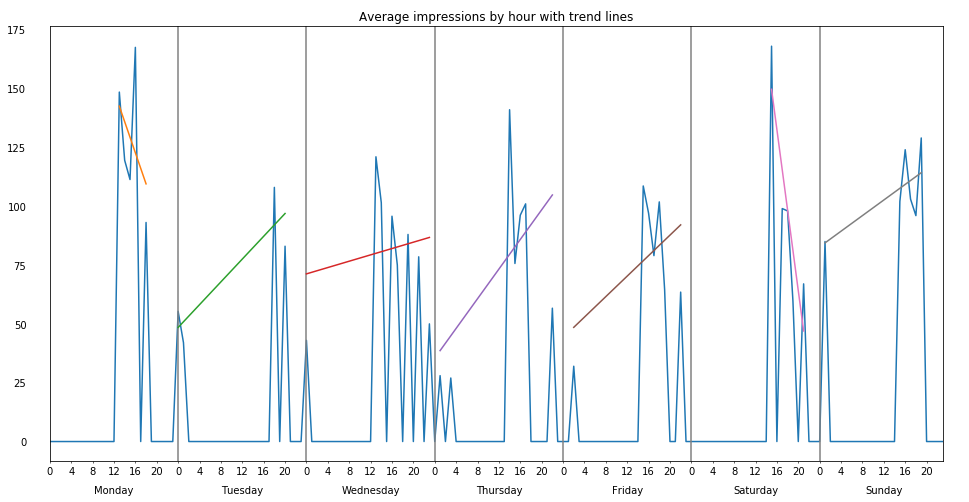

In [215]:
#Plot impressions with trend lines
ax = hourly_means['impressions'].plot(figsize = (16, 8), x_compat = True)

#Create minor and major ticks to records hours and days
#Hours:
hour_mult = 4 #multiple locator 
hour_ticks = [''] + [tup[1] for i, tup in enumerate(hourly_means.index) if i % hour_mult == 0]
ax.xaxis.set_minor_locator(ticker.MultipleLocator(hour_mult))
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(hour_ticks))
#Days:
day_ticks = day_names
#major_loc = ticker.MultipleLocator(24).set_params(base = 12)
ax.xaxis.set_major_locator(ticker.IndexLocator(base = 24, offset = 12))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(day_ticks))
ax.tick_params(which='major', length= 20, color = 'white')
#Draw dividing lines between days
[ax.axvline(i * 24, color = 'gray') for i in range(1, len(day_ticks))]
#Plot trend lines     
[plt.plot(xes[day] + (24 * i), ffits[day]) for i, day in enumerate(day_names)]
plt.title('Average impressions by hour with trend lines')